In [1]:
#This part is for importing libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc

In [2]:
#This part simply extracts the data from the hdf5 file and puts it into an array
hf = h5py.File("SkyNet_r-process.h5")
list(hf)

['A',
 'BindingEnergy',
 'Density',
 'Dt',
 'Entropy',
 'EtaE',
 'HeatingRate',
 'Temperature',
 'Time',
 'Y',
 'Ye',
 'Z']

In [3]:
#This section defines temperature, time, and the extended parts of it.
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []
m = (np.log10(temperature[1700]) - np.log10(temperature[1600])) / (np.log10(time[1700]) - np.log10(time[1600]))
for i in range(0,len(temperature)):
    if i < 1700:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])

Text(0.5, 1.0, 'Log Log Plot of Temperature vs Time for Kilonova Material')

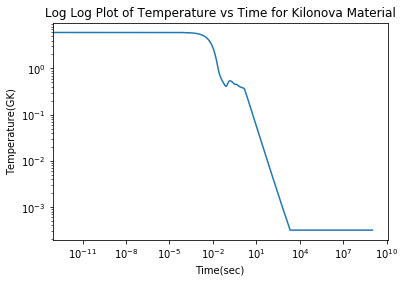

In [4]:
#Plotting Graph 1: Temperature Normal vs Time
plt.loglog(time,temperature)
plt.xlabel("Time(sec)")
plt.ylabel("Temperature(GK)")
plt.title("Log Log Plot of Temperature vs Time for Kilonova Material")

Text(0.5, 1.0, 'Log Log Plot of Temperature vs Time With Linearization For Merger Material')

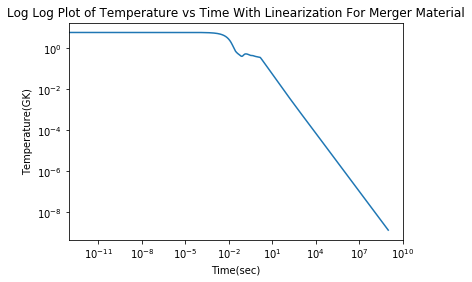

In [6]:
#Graph 2: Temperature vs Time for Linearized Part.
plt.loglog(time,full_temp)
plt.xlabel("Time(sec)")
plt.ylabel("Temperature(GK)")
plt.title("Log Log Plot of Temperature vs Time With Linearization For Merger Material")

29.12983847700328

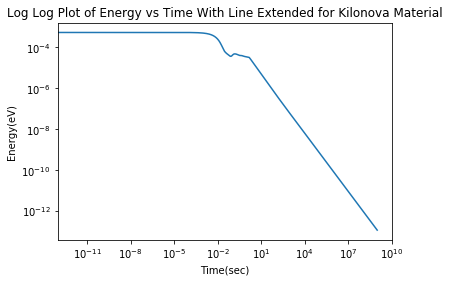

In [7]:
plt.loglog(time,np.array(full_temp)*8.617333262145*10**-5)
plt.xlabel("Time(sec)")
plt.ylabel("Energy(eV)")
plt.title("Log Log Plot of Energy vs Time With Line Extended for Kilonova Material")
time[1500]

(1e-15, 1)

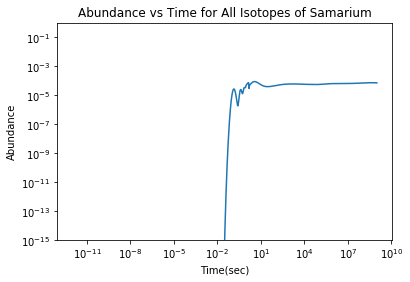

In [8]:
## Trying to extract the data for abundances
abundance = hf["Y"]
mass = hf["A"]
charge = hf["Z"]
index_list = []
full_abundance = []

for i in range(len(charge)):
    if charge[i] == 62:
        index_list.append(i)
        
full_abundance = np.sum(abundance[:, index_list], 1)

#full_abundance = np.zeros(time.shape)
#for j in index_list:
#    full_abundance = full_abundance + abundance[:,j]
#for i in range(len(time)):
#    k=0
#    for j in index_list:
#        k+=abundance[i,j]
#    full_abundance.append(k)
#3202 = col number
#plt.loglog(time, abundance[:,3202])

plt.loglog(time,full_abundance)
plt.xlabel("Time(sec)")
plt.ylabel("Abundance")
plt.title("Abundance vs Time for All Isotopes of Samarium")
plt.ylim([1e-15,1])